# Harish Practise: Sentimental Analysis using NLP

In [3]:
!pip install nltk

# Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import re #Regular Expression
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('dataset.csv')
print(df.shape)
print(df.head(5))

(14640, 15)
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                   

# Segregating Dataset into Input & Output

In [9]:
features = df.iloc[:, 10].values
labels = df.iloc[:, 1].values
print(labels)

['neutral' 'positive' 'neutral' ... 'neutral' 'negative' 'neutral']


In [10]:
print(features)

['@VirginAmerica What @dhepburn said.'
 "@VirginAmerica plus you've added commercials to the experience... tacky."
 "@VirginAmerica I didn't today... Must mean I need to take another trip!"
 ... '@AmericanAir Please bring American Airlines to #BlackBerry10'
 "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
 '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?']


# Removing the Special Character

In [29]:
processed_features = []

for sentence in range(0, len(features)):
    #Remove all the special characters
    processed_feature = re.sub(r'[^a-zA-Z0-9\s]', '', str(features[sentence]))
    
    #Remove all single characters
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+','',processed_feature)
    
    #Remove Single Characters from start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    
    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    
    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)
    

# Feature Extraction from text

In [30]:
nltk.download('stopwords')
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()
print(processed_features)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91829\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Splitting Dataset into Train & Test

In [31]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

# Loading Random Forest Algorithm

In [32]:
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

# Predicting the Test data with Trained Model

In [37]:
predictions = text_classifier.predict(X_test)
predictions

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

# Score of the Model

In [35]:
print(accuracy_score(y_test, predictions))

0.7469262295081968


# Confusion Matrix

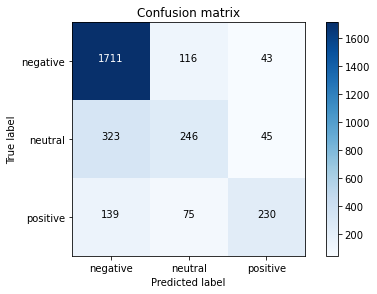

In [38]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = metrics.confusion_matrix(y_test, predictions, labels=['negative', 'neutral', 'positive'])
plot_confusion_matrix(cm, classes=['negative', 'neutral', 'positive'])